In [34]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import datetime
import yfinance as yfin

In [39]:
start = '2010-01-01'
end = '2020-12-31'

yfin.pdr_override()
df = pdr.get_data_yahoo("TSLA",start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [41]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400
2020-12-30,224.000000,232.199997,222.786667,231.593338,231.593338,128538000


In [42]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [43]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [44]:
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


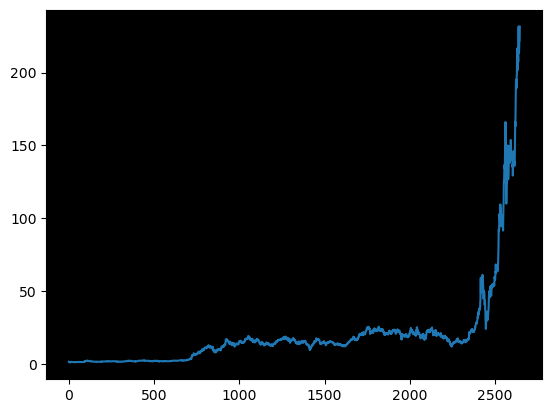

In [62]:
fig = plt.axes()
fig.set_facecolor('black')
plt.plot(df.Close)

In [49]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2641,210.733337,217.166672,207.523331,215.326660,99519000
2642,214.330002,222.029999,213.666672,220.589996,68596800
2643,224.836670,227.133331,220.266663,221.229996,96835800
2644,220.333328,223.300003,218.333328,221.996674,68732400


In [76]:
mean100 = df.Close.rolling(100).mean()
mean100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2641    151.068746
2642    152.283313
2643    153.505599
2644    154.732513
2645    156.079973
Name: Close, Length: 2646, dtype: float64

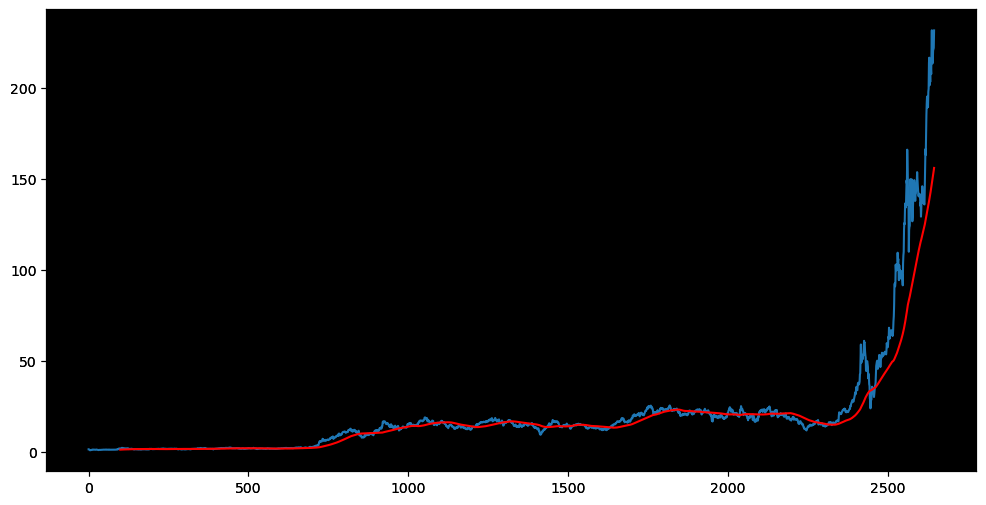

In [77]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
fig = plt.axes()
fig.set_facecolor('black')
plt.plot(df.Close)
plt.plot(mean100,'r')

In [80]:
mean200 = df.Close.rolling(200).mean()
mean200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2641    106.026416
2642    106.942516
2643    107.866460
2644    108.828086
2645    109.842653
Name: Close, Length: 2646, dtype: float64

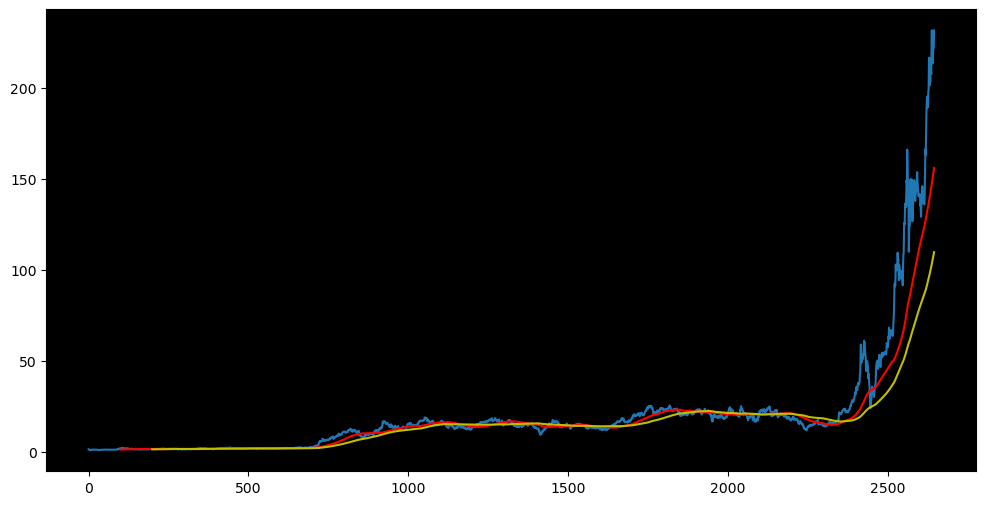

In [83]:
plt.figure(figsize = (12,6))
fig = plt.axes()
fig.set_facecolor('black')
plt.plot(df.Close)
plt.plot(mean100,'r')
plt.plot(mean200,'y')

In [85]:
df.shape

(2646, 5)

In [86]:
#Training Data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
#Testing Data
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1852, 1)
(794, 1)


In [87]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [88]:
data_testing.head()

,Close
1852,20.406000
1853,20.185333
1854,20.403334
1855,20.292667
1856,20.199333


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [91]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.85517328],
       [0.82686883],
       [0.7677681 ]])

In [92]:
data_training_array.shape

(1852, 1)

In [95]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [96]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [100]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [101]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0996
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.0107
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0084
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0085
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0074
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0076
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0082
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0060
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0061
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0059
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0058
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0055
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0055
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0050
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - lo

In [108]:
model.save('keras_model.keras')

In [109]:
data_testing.head()

,Close
1852,20.406000
1853,20.185333
1854,20.403334
1855,20.292667
1856,20.199333


In [110]:
data_training.tail(100)

,Close
1752,25.377333
1753,25.022667
1754,24.760000
1755,24.653334
1756,24.816000
...,...
1847,21.391333
1848,21.338667
1849,22.101999
1850,21.405333


In [112]:
past_100_days = data_training.tail(100)

In [125]:
#final_df = past_100_days.concat([data_testing, ignore_index = True)
final_df = pd.concat([past_100_days,data_testing])

In [126]:
final_df.head()

,Close
1752,25.377333
1753,25.022667
1754,24.760000
1755,24.653334
1756,24.816000


In [127]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0611918 ],
       [0.05957774],
       [0.05838236],
       [0.05789693],
       [0.05863721],
       [0.05989933],
       [0.06178342],
       [0.06203827],
       [0.06023004],
       [0.0556427 ],
       [0.05833381],
       [0.0551512 ],
       [0.05541211],
       [0.05268459],
       [0.04493891],
       [0.03939892],
       [0.04073082],
       [0.04158943],
       [0.04497836],
       [0.04567617],
       [0.04382242],
       [0.04514825],
       [0.04265738],
       [0.04528782],
       [0.0443837 ],
       [0.04579752],
       [0.04533636],
       [0.04962031],
       [0.04873439],
       [0.05002381],
       [0.04717493],
       [0.04736   ],
       [0.04384062],
       [0.04265738],
       [0.04457484],
       [0.05100682],
       [0.05398616],
       [0.05345825],
       [0.05650737],
       [0.05599463],
       [0.05352803],
       [0.05427742],
       [0.05607655],
       [0.05563056],
       [0.05580653],
       [0.05247221],
       [0.05111907],
       [0.048

In [128]:
input_data.shape

(894, 1)

In [132]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [134]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [135]:
print(x_test.shape)
print(y_test.shape)

(794, 100, 1)
(794,)


In [136]:
#Predictions

y_predicted = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [137]:
y_predicted.shape

(794, 1)

In [138]:
y_test

array([0.03856761, 0.03756337, 0.03855548, 0.03805184, 0.03762709,
       0.03762709, 0.04139222, 0.03935947, 0.0401483 , 0.04051237,
       0.04128603, 0.03937161, 0.0421234 , 0.04054272, 0.04143773,
       0.04182001, 0.04204452, 0.03900753, 0.03940498, 0.03870111,
       0.03829759, 0.0378425 , 0.04074296, 0.04013009, 0.04131031,
       0.0454911 , 0.04916824, 0.04856145, 0.04821558, 0.04990246,
       0.04851291, 0.04615553, 0.04551233, 0.04632543, 0.0443655 ,
       0.04196564, 0.04025145, 0.04138009, 0.04016347, 0.04294864,
       0.0419535 , 0.04115557, 0.04175023, 0.04776656, 0.04694132,
       0.04727809, 0.04823379, 0.04770891, 0.04887395, 0.05102805,
       0.05024226, 0.05189577, 0.05236299, 0.05273617, 0.05064275,
       0.04813973, 0.04972042, 0.0517471 , 0.05062151, 0.05319733,
       0.05166215, 0.04999348, 0.04677143, 0.04702628, 0.05037272,
       0.04134064, 0.03988132, 0.04149235, 0.04389827, 0.04348868,
       0.04705661, 0.04748743, 0.04726899, 0.046823  , 0.05072

In [139]:
y_predicted

array([[0.05677554],
       [0.05640557],
       [0.0559915 ],
       [0.05553956],
       [0.05505808],
       [0.05455662],
       [0.05404556],
       [0.05353951],
       [0.05305234],
       [0.0525966 ],
       [0.0521829 ],
       [0.05181994],
       [0.0515115 ],
       [0.05126038],
       [0.05106595],
       [0.05092563],
       [0.05083567],
       [0.05079146],
       [0.05078432],
       [0.05080393],
       [0.0508392 ],
       [0.0508794 ],
       [0.05091484],
       [0.05094099],
       [0.05095662],
       [0.05096386],
       [0.05097154],
       [0.05099531],
       [0.05105114],
       [0.05115107],
       [0.05130357],
       [0.05151059],
       [0.0517655 ],
       [0.05205543],
       [0.05236539],
       [0.05267841],
       [0.05297555],
       [0.05323759],
       [0.05344924],
       [0.05359951],
       [0.05368529],
       [0.053709  ],
       [0.05367616],
       [0.05359516],
       [0.05348292],
       [0.05335903],
       [0.05324234],
       [0.053

In [140]:
scaler.scale_

array([0.00455093])

In [141]:
scale_factor = 1/0.00455093
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

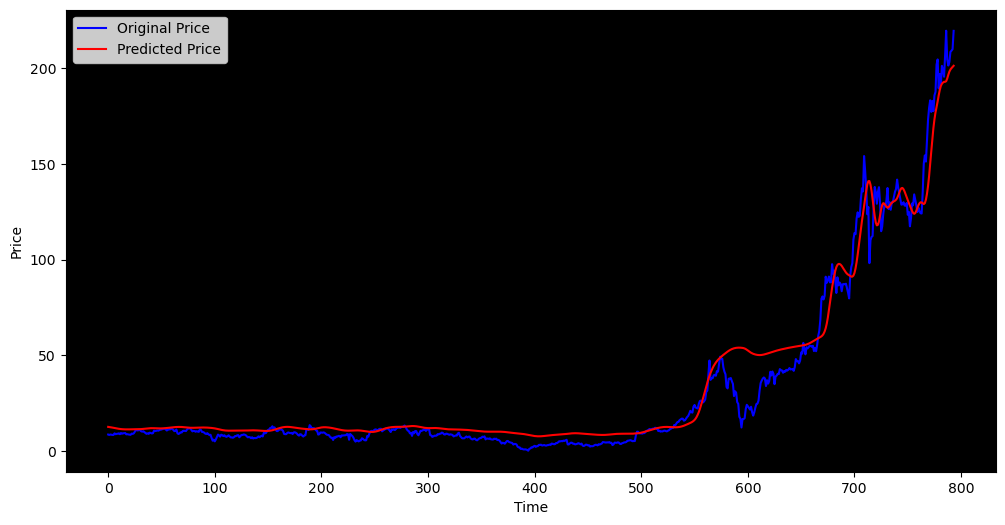

In [142]:
plt.figure(figsize=(12,6))
fig = plt.axes()
fig.set_facecolor('black')
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()